In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import torch
from utils.channel_model import expModel
from utils.utils import evalModelConvex
from graph_dataset_utils import edge_index_gen
from graph_model import LightningEGNN_net
from utils.MNF_cvxpy import MNF_share_solver

In [2]:
K=3
canal=expModel(indicatrix=True)
Kopts=np.arange(K*(K-1))
dist=(canal.rango)*1.0
TA=np.array([[0.0,0.0],[dist,0.0],[0.0,dist]])
NA=np.array([[0.5,0.5]])
rango=0
x=np.linspace(rango,(dist-rango),int(2*((dist))+1))
y=np.linspace(rango,(dist-rango),int(2*((dist))+1))

In [3]:
c_mapCVXPY=np.empty((len(x),len(y)))
mfr=MNF_share_solver(task_config=TA,comm_config=NA, channel=canal, Kopts=Kopts)
for c_i, i in enumerate(x):
    for c_j, j in enumerate(y):
        NA[0,0]=i
        NA[0,1]=j
        #print(NA)
        mfr.update_channel(task_config=TA, comm_config=NA)
        try: 
            C_inicial, rs, ai, Tau, status=mfr.solver()
            c_mapCVXPY[c_i,c_j]=C_inicial
        except:
           pass



In [4]:
import pickle
with open('c_mapCVXPY_map.pkl', 'wb') as f:
    pickle.dump(c_mapCVXPY, f)

In [7]:
import pickle
with open('c_mapCVXPY_viejo.pkl', 'wb') as f:
    pickle.dump(c_mapCVXPY, f)

In [8]:
import pickle
with open('c_mapCVXPY_map.pkl', 'rb') as f:
    c_mapCVXPY = pickle.load(f)

In [9]:
import pickle
with open('c_mapCVXPY_viejo.pkl', 'rb') as f:
    c_mapCVXPY2 = pickle.load(f)

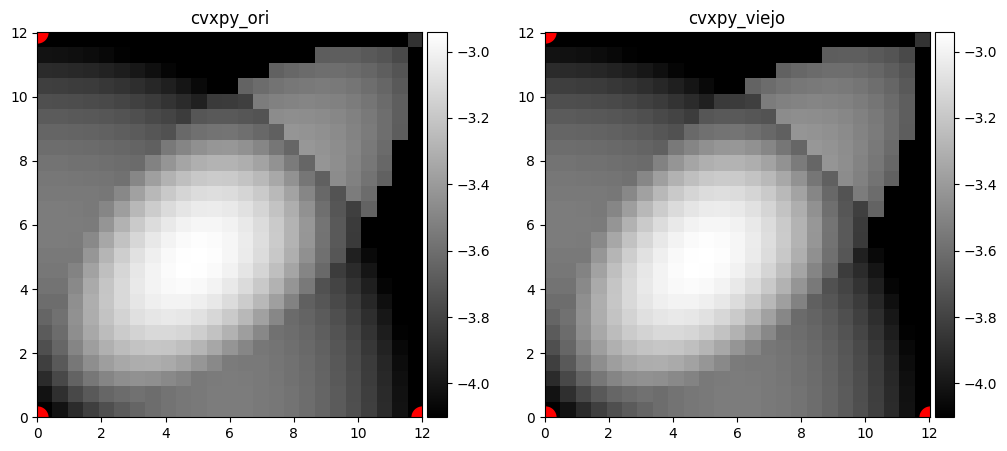

In [10]:
fig =plt.figure(figsize=(12,5))
ax0 = fig.add_subplot(1, 2, 1)

ax0.plot(TA[:,0],TA[:,1],'o', color='red', markersize=15)

divider = make_axes_locatable(ax0)
cax2 = divider.append_axes("right", size="5%", pad=0.05)
# Plot the matrix with the origin at the bottom left
im2= ax0.imshow(c_mapCVXPY.T, cmap=plt.get_cmap('gray'),origin='lower',extent=[x[0], x[-1], y[0], y[-1]],vmax=c_mapCVXPY.max(), vmin=c_mapCVXPY.min())
#im2= ax0.imshow(c_mapCVXPY, cmap=plt.get_cmap('viridis'),origin='lower',vmax=c_mapCVXPY.max(), vmin=c_mapCVXPY.min())

#im2= ax1.imshow(c_map, cmap=plt.get_cmap('viridis'),extent=[x[0], x[-1], y[0], y[-1]], vmax=c_map.max(), vmin=c_map.min())
fig.colorbar(im2,cax=cax2)
ax0.set_title('cvxpy_ori')


ax1 = fig.add_subplot(1, 2, 2)

ax1.plot(TA[:,0],TA[:,1],'o', color='red', markersize=15)

divider = make_axes_locatable(ax1)
cax2 = divider.append_axes("right", size="5%", pad=0.05)

im2= ax1.imshow(c_mapCVXPY2, cmap=plt.get_cmap('gray'),origin='lower',extent=[x[0], x[-1], y[0], y[-1]],vmax=c_mapCVXPY2.max(), vmin=c_mapCVXPY2.min())
#im2= ax1.imshow(c_map, cmap=plt.get_cmap('viridis'),extent=[x[0], x[-1], y[0], y[-1]], vmax=c_map.max(), vmin=c_map.min())
fig.colorbar(im2,cax=cax2)
ax1.set_title('cvxpy_viejo')



plt.show()

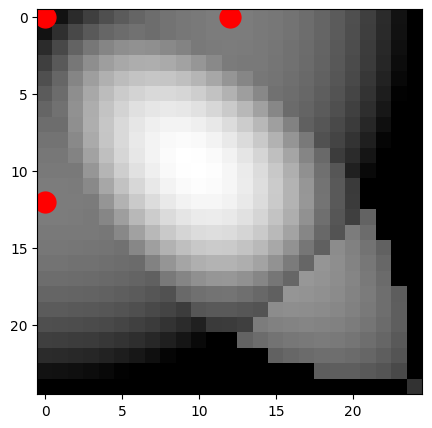

In [7]:
fig =plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)

im2= ax.imshow(c_mapCVXPY, cmap=plt.get_cmap('gray'),\
                vmax=c_mapCVXPY.max(), vmin=c_mapCVXPY.min())
ax.plot(TA[:,0],TA[:,1],'o', color='red', markersize=15)
